# Random forest predictions
This notebook ingests the positive and negative training vectors as well as the prediction set as generated by the notebook ``ExtractDifferenceVectors.ipynb``. It then perfoms Random forest learning and ranks the prediction set.

In [1]:
import pandas as pd
import os
import sys
import numpy as np
sys.path.insert(0, os.path.abspath('..'))
from kcet import KcetParser

In [2]:
data_directory = 'data'
if not os.path.isdir(data_directory):
    raise FileNotFoundError("Could not find data directory")
prediction_pickle_path = os.path.join(data_directory, "predictions.pkl")
positive_diff_pickle_path = os.path.join(data_directory, "positive-vectors.pkl")
negative_diff_pickle_path = os.path.join(data_directory, "negative-vectors.pkl")
diff_vectors_prediction = pd.read_pickle(prediction_pickle_path)
diff_vectors_pos = pd.read_pickle(positive_diff_pickle_path)
diff_vectors_neg = pd.read_pickle(negative_diff_pickle_path)

In [3]:
diff_vectors_prediction.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
ncbigene23552-meshd000008,-0.051209,0.084011,0.730405,0.065429,-0.273851,-0.634715,0.291915,0.011568,-0.388758,-0.477592,...,-0.671479,-0.631413,-1.182751,-0.769748,-0.552924,-0.167896,2.148444,-1.958289,1.355626,1.029576
ncbigene23552-meshd000069293,0.668026,0.905762,1.109056,-0.480065,-0.743062,0.409179,-0.146065,-0.571215,-0.851321,-0.358357,...,-0.183441,-0.544079,-0.740178,-0.388561,-1.177781,0.366836,1.934381,-1.855322,0.339110,0.845183
ncbigene23552-meshd000069584,1.507317,0.575125,-0.335976,0.913206,-0.375005,-1.251479,0.404821,-0.503825,-0.137561,-0.989048,...,-1.055705,-1.408217,-1.841650,-0.817985,0.560964,-0.871144,1.509084,-1.217760,1.547691,1.073488
ncbigene23552-meshd000070779,0.104865,0.363398,0.490374,0.108280,-0.851014,0.011914,0.686822,-0.327724,-0.097188,0.270372,...,-0.228353,0.117324,-0.793168,-0.094594,-1.103647,-0.047167,2.611631,-1.604326,0.701129,1.024496
ncbigene23552-meshd000071380,0.910085,0.628064,0.747378,-0.049967,0.676362,0.203443,-0.751914,0.451223,-0.818799,-1.048621,...,0.257055,-0.764454,0.517299,-1.505752,-1.295998,0.464010,2.227612,-1.926709,0.565487,0.795938


In [4]:
diff_vectors_pos.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
ncbigene1019-meshd001943,1.964191,0.133841,0.043392,1.670026,0.505650,-3.422356,0.087013,-0.814983,-0.503874,-1.733666,...,-0.170987,-1.553427,-3.167705,-2.417357,2.196815,-2.144938,0.362144,-0.513116,3.258217,-0.134064
ncbigene1021-meshd001943,1.844213,0.473288,0.227312,1.676758,0.095014,-2.660356,0.611105,-1.135569,-0.400684,-0.865175,...,-0.803601,-1.525690,-3.331162,-2.741241,2.795542,-2.356816,0.311010,-0.863563,2.688451,-0.172410
ncbigene4921-meshd009396,-0.224754,0.948428,1.026467,0.635036,-2.324069,-1.864379,3.254096,-1.822802,0.112840,3.162467,...,-2.226020,-0.324967,-2.807708,1.539153,0.045233,-1.111351,0.570088,-0.511322,1.015320,1.300445
ncbigene1956-meshd002289,2.189870,-0.466689,-0.098385,0.241185,-0.241982,-2.480665,-0.281667,-0.498487,-0.066791,0.915691,...,-0.003205,-0.857294,-2.594050,0.723908,1.092950,-0.150143,-0.873464,-0.777208,0.621834,-0.582316
ncbigene2064-meshd002289,1.997948,-0.909466,-0.165297,-0.161491,-0.476931,-0.683900,0.014260,1.058111,0.136936,1.636533,...,1.115135,-0.645337,-2.503659,1.350376,0.984235,1.082525,0.034576,0.532850,-1.102190,-0.719152


In [5]:
diff_vectors_neg.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
ncbigene5599-meshd000074723,0.741553,0.551406,0.432369,-0.951339,0.925860,1.027319,-2.206635,0.740244,-0.931750,-2.145724,...,-0.242836,0.105042,0.196043,-1.440463,-2.904278,0.472365,1.848627,-0.297868,0.727904,0.488701
ncbigene203447-meshd047688,-0.825455,-0.329080,0.279959,0.534491,-1.713839,-1.004064,1.839221,-2.031872,0.674700,0.681255,...,-0.749046,-0.424285,-1.396237,0.724492,1.179014,-1.519297,0.831510,0.171211,1.971421,0.788485
ncbigene2185-meshd017253,2.361242,0.764227,0.692874,-1.213370,2.901422,1.390659,-4.377659,2.605597,-1.779988,-2.117172,...,1.436532,-1.027736,3.296202,-3.416092,-2.904995,1.216177,1.846828,-2.493212,-1.425856,0.037801
ncbigene85443-meshd000232,-0.791891,-0.073545,0.138240,0.599509,-1.963801,-0.773073,2.355287,-1.658668,1.754994,1.755923,...,-1.797451,0.818241,-1.201955,0.906054,0.197097,-1.756927,0.671882,0.351121,1.829694,1.599947
ncbigene5292-meshd018305,-0.268939,1.177903,0.526939,0.401880,-0.572590,0.204715,1.215223,-0.445447,-0.367069,1.467492,...,0.158454,0.017613,-1.109298,-0.730569,-0.425263,-1.171496,1.720055,-1.035317,0.013964,1.069449


# Random Forest
### 1. Training set
Create the training set by concatenating ``diff_vectors_pos`` and ``diff_vectors_neg``.

In [6]:
X_train = pd.concat([diff_vectors_pos,diff_vectors_neg])
print("Total training vectors: %d" % len(X_train))

Total training vectors: 5066


In [7]:
label_1 = np.ones(diff_vectors_pos.shape[0])
label_0 = np.zeros(diff_vectors_neg.shape[0])
y_train = np.concatenate((label_1,label_0))
print("Total training labels: %d" % len(y_train))

Total training labels: 5066


### 2. Test set. 
The test set is the prediction set with one label (either 0 or 1)

In [8]:
X_test = diff_vectors_prediction
label_test = np.ones(diff_vectors_prediction.shape[0])
y_test = label_test

In [9]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
ncbigene23552-meshd000008,-0.051209,0.084011,0.730405,0.065429,-0.273851,-0.634715,0.291915,0.011568,-0.388758,-0.477592,...,-0.671479,-0.631413,-1.182751,-0.769748,-0.552924,-0.167896,2.148444,-1.958289,1.355626,1.029576
ncbigene23552-meshd000069293,0.668026,0.905762,1.109056,-0.480065,-0.743062,0.409179,-0.146065,-0.571215,-0.851321,-0.358357,...,-0.183441,-0.544079,-0.740178,-0.388561,-1.177781,0.366836,1.934381,-1.855322,0.339110,0.845183
ncbigene23552-meshd000069584,1.507317,0.575125,-0.335976,0.913206,-0.375005,-1.251479,0.404821,-0.503825,-0.137561,-0.989048,...,-1.055705,-1.408217,-1.841650,-0.817985,0.560964,-0.871144,1.509084,-1.217760,1.547691,1.073488
ncbigene23552-meshd000070779,0.104865,0.363398,0.490374,0.108280,-0.851014,0.011914,0.686822,-0.327724,-0.097188,0.270372,...,-0.228353,0.117324,-0.793168,-0.094594,-1.103647,-0.047167,2.611631,-1.604326,0.701129,1.024496
ncbigene23552-meshd000071380,0.910085,0.628064,0.747378,-0.049967,0.676362,0.203443,-0.751914,0.451223,-0.818799,-1.048621,...,0.257055,-0.764454,0.517299,-1.505752,-1.295998,0.464010,2.227612,-1.926709,0.565487,0.795938


## Hyperparameter tuning the random forest.

In [15]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
#Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 5, 7, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, None], 'min_samples_split': [2, 3, 5, 7, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


## Search over the parameters to choose the best model

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 20, cv = 10, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(X_train,y_train)

best_model = rf_random.best_estimator_

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   31.2s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  4.8min finished


In [17]:
rf_random.best_params_


{'n_estimators': 200,
 'min_samples_split': 7,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': False}

# Link prediction

In [18]:
y_pred = best_model.predict(X_test)
yproba = best_model.predict_proba(X_test)[::,1]

## Decoding results
The ``KcetParser`` class has methods that take the raw X_test vectors and create an annotated dataframe by
decoding strings like ``ncbigene5599-meshd000074723`` to show the corresponding gene symbols and MeSH labels (neoplasms),
and also placing the probabilities of the predictions in the corresponding rows. The resulting dataframe
is sorted according to probability. The ``deleteEmbeddings`` argument determines whether we only return the
three columns ``gene_symbol1``, ``cancer``, and ``probability``.

In [19]:
from kcet import KcetParser
kcetParser = KcetParser()
predictions = kcetParser.decode_predictions(vectors=X_test, probabilities=yproba, deleteEmbeddings=True)
predictions.head()

,gene_symbol,cancer,probability
ncbigene3480-meshd006528,IGF1R,"Carcinoma, Hepatocellular",0.900000
ncbigene2065-meshd008175,ERBB3,Lung Neoplasms,0.877000
ncbigene3480-meshd008175,IGF1R,Lung Neoplasms,0.867500
ncbigene5747-meshd008175,PTK2,Lung Neoplasms,0.855667
ncbigene2065-meshd006528,ERBB3,"Carcinoma, Hepatocellular",0.850833


In [20]:
print("Total number of predictions:", len(predictions))

Total number of predictions: 329669


In [21]:
predictions.to_csv("predictions_2021.tsv",index=False,sep="\t")

## Probability distributions of positive and negative examples
Here, we plot the distributions of the probabiliies of the positive and negative examples as calculated by the random forest.

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns

We concatenated the vectors as follows. ``X_train = pd.concat([diff_vectors_pos,diff_vectors_neg])``
Therefore, we can extract the individual predictions as follows

In [23]:
pos_probs = []
neg_probs = []
n_pos = len(diff_vectors_pos)
n_predictions = len(predictions)
print("[INFO] Extracting %d positive predictions from a total of %d" % (n_pos, n_predictions))

[INFO] Extracting 351 positive predictions from a total of 329669


In [24]:
for i in range(n_predictions):
    row = predictions.iloc[i]
    pr = float(row['probability'])
    if i < n_pos:
        pos_probs.append(pr)
    else:
        neg_probs.append(pr)
# sanity check
print("[INFO] Got %d positive and %d negative predictions" % (len(pos_probs), len(neg_probs)))

[INFO] Got 351 positive and 329318 negative predictions


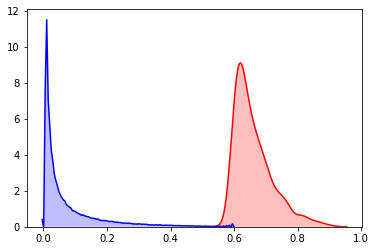

In [25]:

posnp = np.array(pos_probs)
negnp = np.array(neg_probs)
p1=sns.kdeplot(data=posnp, shade=True, color="r")
p1=sns.kdeplot(data=negnp, shade=True, color="b")


The positive examples are shown in red and the negative examples in blue. The separation is of course
an expected result. 
We can calculate some values to estimate some threshold probabilities for predictions.

In [26]:
print("Minimum prob, positive group:", np.min(posnp))
print("Maximum prob, positive group:", np.max(posnp))
print("prob at 1st percentile, positive group:", np.percentile(posnp, 1))
print("prob at 5th percentile, positive group:", np.percentile(posnp, 5))
print("prob at 10th percentile, positive group:", np.percentile(posnp, 20))
print("prob at 20th percentile, positive group:", np.percentile(posnp, 20))
print()
print("Minimum prob, negative group:", np.min(negnp))
print("Maximum prob, negative group:", np.max(negnp))
print("prob at 99th percentile, negative group:", np.percentile(negnp, 99))
print("prob at 95th percentile, negative group:", np.percentile(negnp, 95))
print("prob at 90th percentile, negative group:", np.percentile(negnp, 90))
print("prob at 80th percentile, negative group:", np.percentile(negnp, 80))

Minimum prob, positive group: 0.5959999999999999
Maximum prob, positive group: 0.8999999999999999
prob at 1st percentile, positive group: 0.5970416666666667
prob at 5th percentile, positive group: 0.5998333333333334
prob at 10th percentile, positive group: 0.6107499999999999
prob at 20th percentile, positive group: 0.6107499999999999

Minimum prob, negative group: 0.0
Maximum prob, negative group: 0.5958333333333333
prob at 99th percentile, negative group: 0.37016666666666675
prob at 95th percentile, negative group: 0.17424999999999996
prob at 90th percentile, negative group: 0.09233333333333332
prob at 80th percentile, negative group: 0.03241666666666667
